# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
%matplotlib inline

In [5]:
import json
from pprint import pprint
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# OpenWeather kept locking me out, import time to slow api retrieves
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Set variansts for Record and Set Counts and Page Breaks
record_count = 0
set_count = 1
pg_break =  "-" * 55

# Perform a weather check on each city using a series of successive API calls
# Print log of each city as it'sbeing processed (with the city number and city name)
print('Beginning Data Retrieval')
print(pg_break)

# Setup For Loop
for city in cities:
    query_params = {
        'appid': weather_api_key,
        'q': city
    }
# Setup Record Count and Error Handler
    try:
        record_count += 1
        weather_response = requests.get(url, params=query_params)
        weather_json = weather_response.json()

        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {weather_json['name']}")
            time.sleep(0.25)
        else:
            record_count = 1
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {weather_json['name']}")
            record_count += 1
    except:
        print(f"Record {record_count} of Set {set_count} | {city}, Not Found. Skipping...")

# Print Results to Display
print(pg_break)
print("Data Retrieval Complete")
print(pg_break)

Beginning Data Retrieval
-------------------------------------------------------
Record 1 of Set 1 | illoqqortoormiut, Not Found. Skipping...
Record 2 of Set 1 | taolanaro, Not Found. Skipping...
Processing Record 3 of Set 1 | Hermanus
Processing Record 4 of Set 1 | Sangar
Processing Record 5 of Set 1 | Grimshaw
Record 6 of Set 1 | belushya guba, Not Found. Skipping...
Processing Record 7 of Set 1 | Mount Isa
Processing Record 8 of Set 1 | New Norfolk
Processing Record 9 of Set 1 | Albany
Processing Record 10 of Set 1 | Punta Arenas
Processing Record 11 of Set 1 | Hecun
Processing Record 12 of Set 1 | Busselton
Processing Record 13 of Set 1 | Rikitea
Processing Record 14 of Set 1 | Vardø
Processing Record 15 of Set 1 | Minbu
Processing Record 16 of Set 1 | Wad Rāwah
Processing Record 17 of Set 1 | Carnarvon
Processing Record 18 of Set 1 | Hithadhoo
Processing Record 19 of Set 1 | Camargo
Record 20 of Set 1 | viligili, Not Found. Skipping...
Processing Record 21 of Set 1 | Dikson
Proces

Processing Record 46 of Set 4 | Cabedelo
Processing Record 47 of Set 4 | Lander
Processing Record 48 of Set 4 | Upernavik
Processing Record 49 of Set 4 | Faanui
Processing Record 50 of Set 4 | Laguna
Processing Record 1 of Set 5 | Caldwell
Processing Record 3 of Set 5 | Peterhead
Record 4 of Set 5 | marv dasht, Not Found. Skipping...
Processing Record 5 of Set 5 | Samarai
Record 6 of Set 5 | tsihombe, Not Found. Skipping...
Processing Record 7 of Set 5 | Saskylakh
Processing Record 8 of Set 5 | Okha
Processing Record 9 of Set 5 | Nemuro
Processing Record 10 of Set 5 | Ribeira Grande
Processing Record 11 of Set 5 | Esperance
Processing Record 12 of Set 5 | Cidreira
Processing Record 13 of Set 5 | East London
Processing Record 14 of Set 5 | Abu Dhabi
Processing Record 15 of Set 5 | Mareeba
Processing Record 16 of Set 5 | Saint Anthony
Processing Record 17 of Set 5 | Maní
Processing Record 18 of Set 5 | Fairbanks
Processing Record 19 of Set 5 | Bengkulu
Processing Record 20 of Set 5 | Pen

Processing Record 46 of Set 8 | Gazli
Processing Record 47 of Set 8 | Camabatela
Processing Record 48 of Set 8 | Collie
Processing Record 49 of Set 8 | Alofi
Processing Record 50 of Set 8 | Cururupu
Processing Record 1 of Set 9 | Jinchang
Processing Record 3 of Set 9 | Hay River
Processing Record 4 of Set 9 | Kamenka
Processing Record 5 of Set 9 | Kuytun
Processing Record 6 of Set 9 | Chamba
Processing Record 7 of Set 9 | Calvià
Processing Record 8 of Set 9 | Port Augusta
Processing Record 9 of Set 9 | San Andrés
Processing Record 10 of Set 9 | Agadez
Processing Record 11 of Set 9 | Belaya Gora
Processing Record 12 of Set 9 | La Cruz
Processing Record 13 of Set 9 | Cayenne
Record 14 of Set 9 | palabuhanratu, Not Found. Skipping...
Processing Record 15 of Set 9 | Rome
Processing Record 16 of Set 9 | Kamaishi
Processing Record 17 of Set 9 | Neryungri
Processing Record 18 of Set 9 | Grindavik
Processing Record 19 of Set 9 | Uvalde
Processing Record 20 of Set 9 | Chui
Processing Record 21 

Processing Record 39 of Set 12 | Sulphur
Processing Record 40 of Set 12 | Coolum Beach
Processing Record 41 of Set 12 | Maumere
Processing Record 42 of Set 12 | Twentynine Palms
Processing Record 43 of Set 12 | Havelock
Processing Record 44 of Set 12 | Guerrero Negro
Processing Record 45 of Set 12 | Hobyo
Processing Record 46 of Set 12 | Toledo
Processing Record 47 of Set 12 | Homer
Processing Record 48 of Set 12 | Oodweyne
Processing Record 49 of Set 12 | Alice Springs
Processing Record 50 of Set 12 | Pundaguitan
Processing Record 1 of Set 13 | Winslow
Processing Record 3 of Set 13 | Nkawkaw
Processing Record 4 of Set 13 | Tessalit
Processing Record 5 of Set 13 | Sakaiminato
Processing Record 6 of Set 13 | Charters Towers
Processing Record 7 of Set 13 | Uvat
Processing Record 8 of Set 13 | Luau
Processing Record 9 of Set 13 | San Rafael
Processing Record 10 of Set 13 | Tegul'det
Processing Record 11 of Set 13 | Aplahoué
Processing Record 12 of Set 13 | Deori
Processing Record 13 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create empty list for city data
city_data = []

# Create Dictionary with For Loop
for city in cities:
    query_params = {
        'appid': weather_api_key,
        'q': city,
        'units': units
    }
# Pull data from json, append data to list and setup error handlers
    try:
        weather_response = requests.get(url, params=query_params)
        weather_json = weather_response.json()
        time.sleep(0.25)
        
        city_data.append(
            {
                'City': weather_json['name'],
                'Lat': weather_json['coord']['lat'],
                'Lng': weather_json['coord']['lon'],
                'Max Temp °F': weather_json['main']['temp_max'],
                'Humidity': weather_json['main']['humidity'],
                'Cloudiness': weather_json['clouds']['all'],
                'Wind Speed': weather_json['wind']['speed'],
                'Country': weather_json['sys']['country'],
                'Date': weather_json['dt']
            }
        )

    except:
        pass
# Set DataFrame, Output to screen and csv file
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv('Weather_Output/City_Data.csv', index=False, header=True)
city_data_df

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,61.00,83,85,13.62,ZA,1603662192
1,Sangar,63.92,127.47,14.23,90,100,4.76,RU,1603662192
2,Grimshaw,56.18,-117.60,33.80,37,20,14.99,CA,1603662193
3,Mount Isa,-20.73,139.50,69.80,32,91,11.41,AU,1603661895
4,New Norfolk,-42.78,147.06,48.00,64,2,1.01,AU,1603662194
...,...,...,...,...,...,...,...,...,...
597,Northam,51.03,-4.22,50.00,94,15,14.07,GB,1603662419
598,Akureyri,65.68,-18.09,42.80,75,75,13.87,IS,1603662435
599,Kikwit,-5.04,18.82,72.73,94,96,1.86,CD,1603662436
600,The Valley,18.22,-63.06,84.20,79,20,13.87,AI,1603662436


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Display overview of dataframe for review
city_data_df.describe()

,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Date
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02
mean,20.206196,15.822143,59.772807,72.805648,55.254153,8.366595,1.603662e+09
std,32.189304,90.587705,21.338792,20.559894,38.784702,5.870497,1.017221e+02
min,-54.800000,-175.200000,-2.200000,12.000000,0.000000,0.200000,1.603661e+09
25%,-6.220000,-65.897500,45.000000,64.000000,13.500000,4.075000,1.603662e+09
50%,20.990000,21.185000,66.180000,78.000000,69.000000,6.930000,1.603662e+09
75%,46.825000,94.475000,77.852500,88.000000,90.000000,11.410000,1.603662e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,46.350000,1.603662e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
# Skipped this step, no cities had humidity over 100%
city_data_df.loc[city_data_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date


In [14]:
# Identify the Outliers for Humidity
quartiles = city_data_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {round(lowerq,2)}")
print(f"The upper quartile of Humidity is: {round(upperq,2)}")
print(f"The interquartile range of Humidity is: {round(iqr,4)}")
print(f"The median of Humidity is: {round(quartiles[0.5],4)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of Humidity is: 64.0
The upper quartile of Humidity is: 88.0
The interquartile range of Humidity is: 24.0
The median of Humidity is: 78.0 
Values below 28.0 could be outliers.
Values above 124.0 could be outliers.


In [15]:
# Display outliers
city_data_df.loc[(city_data_df['Humidity'] < lower_bound) | (city_data_df['Humidity'] > upper_bound)]

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date
12,Wad Rāwah,15.16,33.14,84.96,21,0,12.41,SD,1603662197
15,Camargo,27.67,-105.17,89.49,14,0,19.71,MX,1603662198
25,Trelew,-43.25,-65.31,67.62,23,27,21.65,AR,1603662202
41,Warah,27.45,67.80,69.48,21,0,4.59,PK,1603662209
78,Nouakchott,18.09,-15.98,91.40,14,0,9.17,MR,1603662118
126,Portland,45.52,-122.68,48.00,26,20,19.46,US,1603661501
146,Taoudenni,22.68,-3.98,87.35,13,21,8.63,ML,1603662250
153,Ouallam,14.32,2.09,85.73,12,0,8.72,NE,1603662253
167,Farmington,36.73,-108.22,69.80,21,90,20.80,US,1603661965
183,Caldwell,43.66,-116.69,45.00,22,1,14.99,US,1603662264


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.loc[(city_data_df['Humidity'] >= lower_bound) &
                                  (city_data_df['Humidity'] <= upper_bound)]
clean_city_data

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,61.00,83,85,13.62,ZA,1603662192
1,Sangar,63.92,127.47,14.23,90,100,4.76,RU,1603662192
2,Grimshaw,56.18,-117.60,33.80,37,20,14.99,CA,1603662193
3,Mount Isa,-20.73,139.50,69.80,32,91,11.41,AU,1603661895
4,New Norfolk,-42.78,147.06,48.00,64,2,1.01,AU,1603662194
...,...,...,...,...,...,...,...,...,...
597,Northam,51.03,-4.22,50.00,94,15,14.07,GB,1603662419
598,Akureyri,65.68,-18.09,42.80,75,75,13.87,IS,1603662435
599,Kikwit,-5.04,18.82,72.73,94,96,1.86,CD,1603662436
600,The Valley,18.22,-63.06,84.20,79,20,13.87,AI,1603662436


In [18]:
clean_city_data.describe()

,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.280370,19.120176,58.751552,76.119929,57.410935,8.202857,1.603662e+09
std,32.794046,91.035528,21.408537,16.070727,38.224538,5.800044,9.640700e+01
min,-54.800000,-175.200000,-2.200000,28.000000,0.000000,0.200000,1.603661e+09
25%,-7.425000,-63.040000,42.900000,68.000000,20.000000,3.970000,1.603662e+09
50%,21.430000,24.480000,64.110000,79.000000,75.000000,6.930000,1.603662e+09
75%,49.690000,100.700000,77.165000,88.000000,91.000000,11.410000,1.603662e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,46.350000,1.603662e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

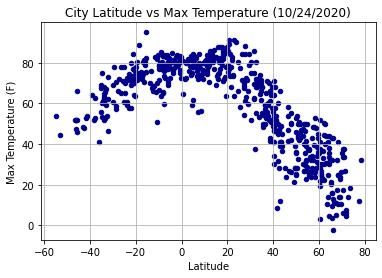

In [21]:
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp °F', c='DarkBlue')
plt.title('City Latitude vs Max Temperature (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/Latitude_vs_Temp_Plot.png")
plt.show()

## Latitude vs. Humidity Plot

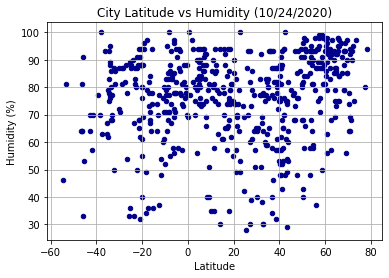

In [22]:
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity', c='DarkBlue')
plt.title('City Latitude vs Humidity (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/Latitude_vs_Humidity_Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

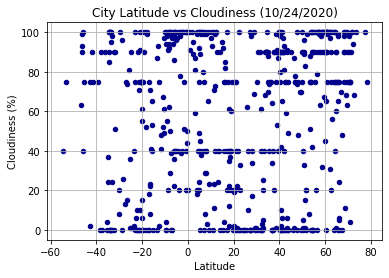

In [23]:
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness', c='DarkBlue')
plt.title('City Latitude vs Cloudiness (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

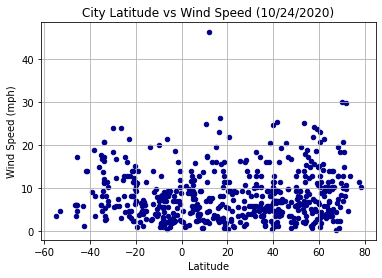

In [24]:
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed', c='DarkBlue')
plt.title('City Latitude vs Wind Speed (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/Latitude_vs_Wind_Speed_Plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8754249128781086


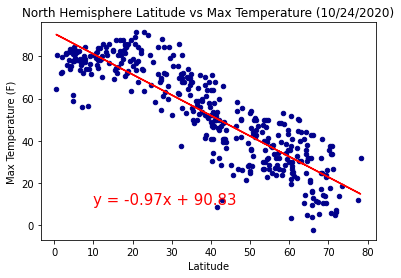

In [25]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_temp = NHemisphere_city_data_df['Max Temp °F']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_temp)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Max Temp °F', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Max Temperature (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/N_Hemisph_MaxTemp_vs_Lat_Linear_Regr.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7562558708393


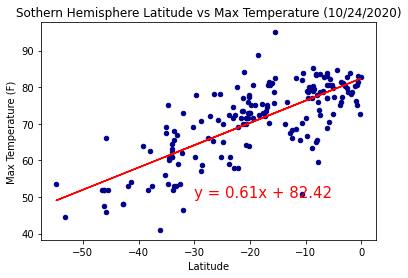

In [26]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_temp = SHemisphere_city_data_df['Max Temp °F']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_temp)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Max Temp °F', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Max Temperature (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/S_Hemisph_MaxTemp_vs_Lat_Linear_Regr.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20070702523647657


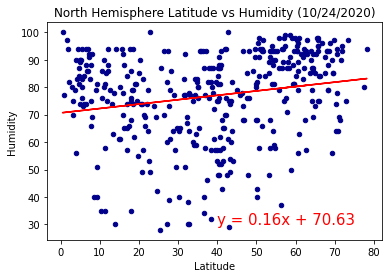

In [33]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_humidity = NHemisphere_city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_humidity)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Humidity', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Humidity (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/N_Hemisph_Humidity_vs_Lat_Linear_Regr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1169282696465481


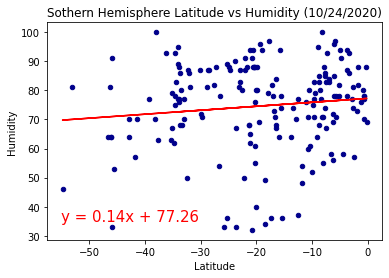

In [34]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_humidity = SHemisphere_city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_humidity)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Humidity', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Humidity (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/S_Hemisph_Humidity_vs_Lat_Linear_Regr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1761519026236903


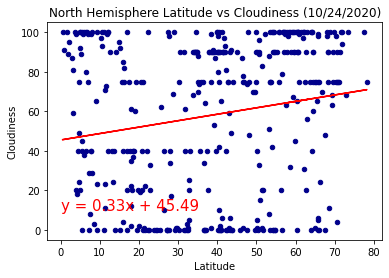

In [29]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_cloud = NHemisphere_city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_cloud)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Cloudiness', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Cloudiness (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/N_Hemisph_Cloudiness_vs_Lat_Linear_Regr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1040507444208434


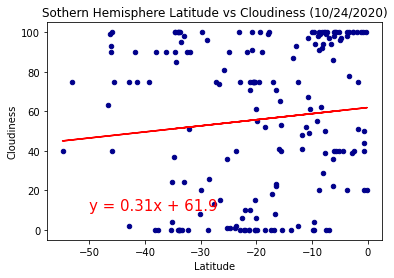

In [30]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_cloud = SHemisphere_city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_cloud)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Cloudiness', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Cloudiness (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/S_Hemisph_Cloudiness_vs_Lat_Linear_Regr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11934563894073488


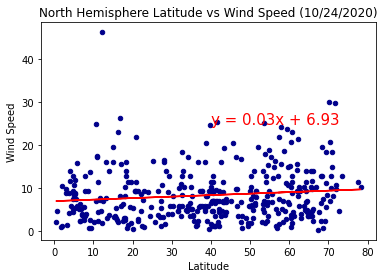

In [31]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_wind = NHemisphere_city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_wind)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Wind Speed', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Wind Speed (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/N_Hemisph_Wind_Speed_vs_Lat_Linear_Regr.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22537181152097624


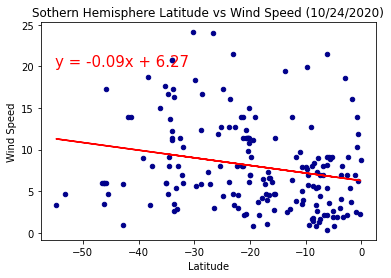

In [32]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_wind = SHemisphere_city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_wind)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Wind Speed', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Wind Speed (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/S_Hemisph_Wind_Speed_vs_Lat_Linear_Regr.png")
plt.show()